### Download celeba from zip file

In [2]:
import zipfile
import os

# Specify the path to your ZIP file
zip_file_path = 'data/celeba_256/images/archive.zip'

# Determine the extraction directory (same as the ZIP file's location)
extraction_directory = os.path.dirname(zip_file_path)

# Open the ZIP file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extraction_directory)

print("Extraction complete.")


Extraction complete.


### Tensorboard Viewing

In [3]:
!cd checkpoints/
!tensorboard --logdir ./

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### Check out Pre-trained VAE

In [4]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import os
import numpy as np
from os.path import join as oj
import matplotlib.pyplot as plt
from models import vae
plt.style.use('dark_background')
def to_im(x):
    return x.cpu().detach().numpy().reshape((28, 28))

In [6]:
net = vae.VAE()
net.load_state_dict(torch.load('models/weights/vae_epoch_25.pth'))

<All keys matched successfully>

In [13]:
im0 = datasets.MNIST(root='data', train=True).data[0].float()
im1 = datasets.MNIST(root='data', train=True).data[1].float()
im2 = datasets.MNIST(root='data', train=True).data[2].float()
im2_reconstructed = to_im(net(im2)[0])

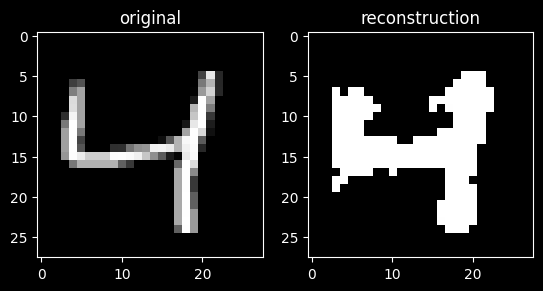

In [14]:
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(im2_reconstructed, cmap='gray')
plt.title('reconstruction')
plt.show()

In [15]:
(mu0, logvar0) = net.encode(im0.reshape(-1, 784))
(mu1, logvar1) = net.encode(im1.reshape(-1, 784))
(mu2, logvar2) = net.encode(im2.reshape(-1, 784))

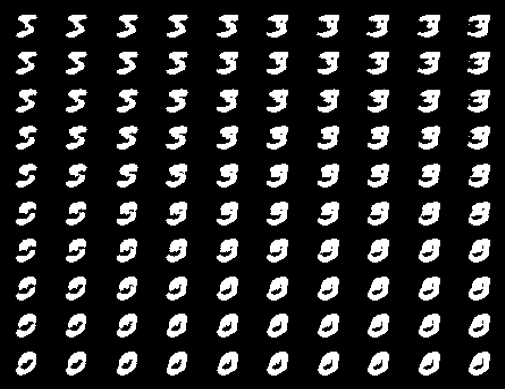

In [16]:
R, C = 10, 10
i = 0
for r, w1 in enumerate(np.linspace(0, 1, 10)):
    for c, w2 in enumerate(np.linspace(0, 1, 10)):
        plt.subplot(R, C, i + 1)
        plt.imshow(to_im(net.decode(mu0 + w1 * mu1 + w2 * mu2)), cmap='gray')
        plt.axis('off')
        i += 1
plt.show()